In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cic-iot-2023-reduced/ciciot2023-reduced.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model, Sequential
from keras.layers import Dense, LSTM, Activation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline
from sklearn.utils import shuffle

2024-04-30 15:18:58.702291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 15:18:58.702419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 15:18:58.855491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('/kaggle/input/cic-iot-2023-reduced/ciciot2023-reduced.csv')
data.head()

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0,0.0,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,...,0.0,42.0,8.314949e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
1,1,0.0,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,...,0.0,42.0,8.312898e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
2,2,0.0,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,...,0.0,42.0,8.314964e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
3,3,0.0,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,...,0.0,42.0,8.312906e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
4,4,0.0,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,42.0,8.312889e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood


In [4]:
data.drop(columns='Unnamed: 0', inplace=True)
data

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312898e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314964e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
3,0.000000,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312906e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312889e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,21.931409,3877.2,3.1,57.1,35.848699,35.848699,0.0,0.0,0.0,0.0,...,251.519584,147.8,3.352358e-02,5.5,20.309082,355.702407,72476.897264,0.9,38.50,Uploading_Attack
1177094,623.726814,86935.3,5.5,70.4,0.214131,0.214131,0.0,0.0,0.0,0.0,...,437.244141,684.1,1.630549e-02,5.5,22.382339,618.356594,568501.573782,0.9,38.50,Uploading_Attack
1177095,82.325677,7351.8,13.2,71.2,28.355732,28.355732,0.0,0.0,0.0,0.0,...,47.763924,157.1,1.115448e-02,5.5,17.417450,67.548389,2551.505968,0.9,38.50,Uploading_Attack
1177096,45.667144,2508.2,10.4,111.6,129097.868387,129097.868387,0.0,0.0,0.0,0.0,...,45.064730,109.2,4.131398e-02,5.5,14.717295,63.731153,2333.652536,0.9,38.50,Uploading_Attack


In [5]:
dataset = data.copy()
dataset.drop(columns=['Telnet', 'DHCP', 'SMTP'], inplace=True)

In [6]:
dataset

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312898e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314964e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
3,0.000000,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312906e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312889e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,21.931409,3877.2,3.1,57.1,35.848699,35.848699,0.0,0.0,0.0,0.0,...,251.519584,147.8,3.352358e-02,5.5,20.309082,355.702407,72476.897264,0.9,38.50,Uploading_Attack
1177094,623.726814,86935.3,5.5,70.4,0.214131,0.214131,0.0,0.0,0.0,0.0,...,437.244141,684.1,1.630549e-02,5.5,22.382339,618.356594,568501.573782,0.9,38.50,Uploading_Attack
1177095,82.325677,7351.8,13.2,71.2,28.355732,28.355732,0.0,0.0,0.0,0.0,...,47.763924,157.1,1.115448e-02,5.5,17.417450,67.548389,2551.505968,0.9,38.50,Uploading_Attack
1177096,45.667144,2508.2,10.4,111.6,129097.868387,129097.868387,0.0,0.0,0.0,0.0,...,45.064730,109.2,4.131398e-02,5.5,14.717295,63.731153,2333.652536,0.9,38.50,Uploading_Attack


In [7]:
dataset.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,...,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06
mean,2.797806e+01,6.447324e+05,9.727536e+00,9.466363e+01,4.495814e+03,4.495814e+03,5.210983e-07,3.395979e-02,9.441610e-02,3.643877e-02,...,4.423327e+02,3.040127e+02,4.427145e+02,8.332583e+07,9.500390e+00,2.427685e+01,4.294849e+02,3.877413e+05,5.527144e-01,1.415569e+02
std,2.789426e+02,1.169586e+06,9.151269e+00,4.666282e+01,6.180899e+04,6.180899e+04,1.261112e-04,1.811258e-01,2.924069e-01,1.873793e-01,...,5.816266e+02,5.014538e+02,5.859603e+02,6.461473e+07,3.104848e+00,1.660295e+01,7.096259e+02,1.380319e+06,4.397034e-01,7.996218e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.559465e-02,8.400000e+01,6.000000e+00,6.400000e+01,9.840240e+00,9.840240e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.401677e+01,0.000000e+00,5.406000e+01,1.659933e-02,5.500000e+00,1.039357e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.850000e+01
50%,5.749314e+00,5.308980e+04,6.000000e+00,6.591000e+01,3.974216e+01,3.974216e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.274585e+02,4.738432e+01,1.176000e+02,8.315033e+07,9.500000e+00,1.578336e+01,6.645081e+01,3.226114e+03,8.000000e-01,1.415500e+02
75%,3.338861e+01,8.073643e+05,9.300000e+00,1.133000e+02,8.183739e+01,8.183739e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.920000e+02,5.236078e+02,5.920000e+02,1.665181e+08,1.350000e+01,3.437831e+01,7.394102e+02,3.204772e+05,1.000000e+00,2.446000e+02
max,7.472130e+04,9.825656e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,5.928655e-02,1.000000e+00,1.000000e+00,1.000000e+00,...,1.160047e+04,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.453904e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177098 entries, 0 to 1177097
Data columns (total 44 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1177098 non-null  float64
 1   Header_Length    1177098 non-null  float64
 2   Protocol Type    1177098 non-null  float64
 3   Duration         1177098 non-null  float64
 4   Rate             1177098 non-null  float64
 5   Srate            1177098 non-null  float64
 6   Drate            1177098 non-null  float64
 7   fin_flag_number  1177098 non-null  float64
 8   syn_flag_number  1177098 non-null  float64
 9   rst_flag_number  1177098 non-null  float64
 10  psh_flag_number  1177098 non-null  float64
 11  ack_flag_number  1177098 non-null  float64
 12  ece_flag_number  1177098 non-null  float64
 13  cwr_flag_number  1177098 non-null  float64
 14  ack_count        1177098 non-null  float64
 15  syn_count        1177098 non-null  float64
 16  fin_count        1

In [9]:
dataset = shuffle(dataset).reset_index(drop=True)

In [10]:
y_label = dataset['label'].unique()
y_label

array(['BenignTraffic', 'DDoS-RSTFINFlood', 'DDoS-ICMP_Flood',
       'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
       'DoS-SYN_Flood', 'DDoS-SYN_Flood', 'Mirai-greip_flood',
       'DDoS-TCP_Flood', 'DoS-UDP_Flood', 'Mirai-udpplain',
       'DDoS-UDP_Flood', 'Mirai-greeth_flood', 'DoS-TCP_Flood',
       'DDoS-PSHACK_Flood', 'Recon-PortScan', 'XSS', 'DNS_Spoofing',
       'Recon-OSScan', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'DDoS-UDP_Fragmentation', 'Backdoor_Malware', 'DoS-HTTP_Flood',
       'DDoS-HTTP_Flood', 'Recon-HostDiscovery', 'DictionaryBruteForce',
       'Recon-PingSweep', 'DDoS-SlowLoris', 'VulnerabilityScan',
       'SqlInjection', 'BrowserHijacking', 'CommandInjection',
       'Uploading_Attack'], dtype=object)

In [11]:
# Creating a dictionary of attack types for 33 attack classes + 1 for benign traffic
dict_34_classes = {'BenignTraffic': 0 ,
                    'DDoS-RSTFINFlood' :1, 'DDoS-PSHACK_Flood':2,  'DDoS-SYN_Flood':3, 'DDoS-UDP_Flood':4, 'DDoS-TCP_Flood':5, 
                    'DDoS-ICMP_Flood':6, 'DDoS-SynonymousIP_Flood':7, 'DDoS-ACK_Fragmentation':8, 'DDoS-UDP_Fragmentation':9, 'DDoS-ICMP_Fragmentation':10, 
                    'DDoS-SlowLoris':11, 'DDoS-HTTP_Flood':12, 'DoS-UDP_Flood':13, 'DoS-SYN_Flood':14, 'DoS-TCP_Flood':15, 'DoS-HTTP_Flood':16,                 # DDoS and DoS
                    'Mirai-greeth_flood': 17, 'Mirai-greip_flood': 18, 'Mirai-udpplain': 19,                                                                    # Mirai 
                    'Recon-PingSweep': 20, 'Recon-OSScan': 21, 'Recon-PortScan': 22, 'VulnerabilityScan': 23, 'Recon-HostDiscovery': 24,                        # Reconnaissance
                    'DNS_Spoofing': 25, 'MITM-ArpSpoofing': 26,                                                                                                 # Spoofing
                    'BrowserHijacking': 27, 'Backdoor_Malware': 28, 'XSS': 29, 'Uploading_Attack': 30, 'SqlInjection': 31, 'CommandInjection': 32,              # Web
                    'DictionaryBruteForce': 33}                                                                                                                 # Brute Force                                                                                                                                      # Brute Force

dict_2_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS  
                    17: 1, 18: 1, 19: 1,                                                                                                                        # Mirai 
                    20: 1, 21: 1, 22: 1, 23: 1, 24: 1,                                                                                                          # Reconnaissance
                    25: 1, 26: 1,                                                                                                                               # Spoofing
                    27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1,                                                                                                   # Web
                    33: 1}                                                                                                                                      # Brute Force

# Map y column to the dict_34_classes values
dataset['label'] = dataset['label'].map(dict_34_classes)
dataset['label'] = dataset['label'].map(dict_2_classes)

In [12]:
dataset.label.value_counts()

label
0    687403
1    489695
Name: count, dtype: int64

<Axes: xlabel='label'>

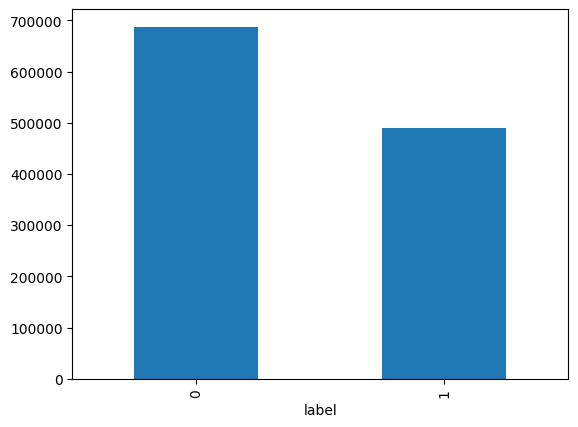

In [13]:
dataset.label.value_counts().plot.bar()

In [14]:
dataset_reduced = dataset.drop(columns=['Min', 'Max', 'AVG', 'Std', 'Number', 'Magnitue', 'Radius','Variance', 'Weight', 'Covariance'],
                              axis=1)
dataset_reduced

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,TCP,UDP,ARP,ICMP,IPv,LLC,Tot sum,Tot size,IAT,label
0,16.321978,1548805.00,6.0,232.00,91.869994,91.869994,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,363.00,66.00,1.459599e-03,0
1,42.845143,88490.00,4.7,56.30,13.404526,13.404526,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1944.60,98.00,1.665257e+08,0
2,0.000000,54.00,6.0,64.00,3.742691,3.742691,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,8.334476e+07,1
3,25.189564,1879586.20,6.6,170.60,55.423621,55.423621,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1035.40,70.00,1.665181e+08,0
4,0.000000,0.00,1.0,64.00,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,8.314944e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,4.723802,57663.40,7.6,112.00,15.488271,15.488271,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,826.40,270.80,2.399611e-02,0
1177094,15.692128,35817.10,7.1,117.40,14.818221,14.818221,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1772.90,121.30,1.665252e+08,0
1177095,72.254285,4738852.60,6.0,130.80,64.702265,64.702265,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,5795.40,1079.60,1.665245e+08,0
1177096,0.000000,0.00,1.0,64.00,5.599464,5.599464,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,8.314948e+07,1


In [15]:
dataset_reduced = shuffle(dataset_reduced).reset_index(drop=True)

In [16]:
### splitting the dataset into train, validation and test set.
X = dataset_reduced.iloc[:, :-1].values
y = dataset_reduced.iloc[:, -1].values

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
X_test_p1, X_test_p, y_test_p1, y_test_p = train_test_split(X_test, y_test, test_size=0.8, random_state=42)


print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

X train (823968, 33)
X val (176565, 33)
X test (176565, 33)
Y train (823968,)
Y val (176565,)
Y test (176565,)


In [17]:
scalar = StandardScaler()
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)
X_test_p1_scaled = scalar.transform(X_test_p1)
X_test_p_scaled = scalar.transform(X_test_p)

### Define an ANN model

In [18]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(33,)))

model.add(Dense(units=4))
model.add(Activation('relu'))

model.add(Dense(units=4))
model.add(Activation('relu'))

model.add(Dense(units=1),)
model.add(Activation('sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [19]:
np.any(np.isnan(dataset_reduced))

False

In [20]:
# dataset_reduced.to_csv("cic-iot-2023-updated.csv")


In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=40, verbose=1,
                    batch_size=512, callbacks=[callback])

Epoch 1/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7304 - loss: 0.6523 - val_accuracy: 0.7413 - val_loss: 0.6270
Epoch 2/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7427 - loss: 0.6175 - val_accuracy: 0.7436 - val_loss: 0.5910
Epoch 3/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7446 - loss: 0.5818 - val_accuracy: 0.7398 - val_loss: 0.5575
Epoch 4/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7399 - loss: 0.5488 - val_accuracy: 0.8574 - val_loss: 0.5258
Epoch 5/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8574 - loss: 0.5176 - val_accuracy: 0.8555 - val_loss: 0.4961
Epoch 6/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8538 - loss: 0.4888 - val_accuracy: 0.8522 - val_loss: 0.4686
Epoch 7/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8515 - loss: 0.4611 - val_accuracy: 0.8511 - val_loss: 0.4432
Epoch 8/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.4368 - 

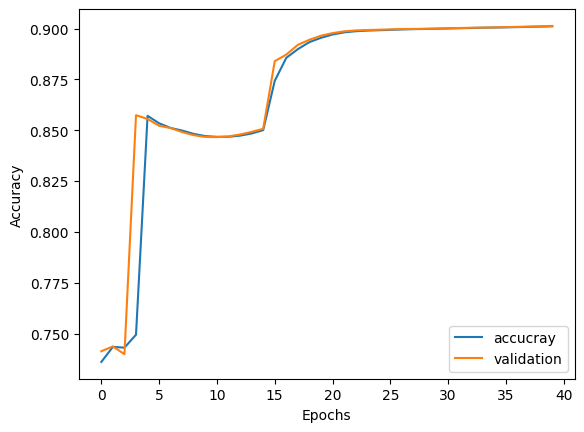

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accucray', 'validation'], loc = 'lower right')
# plt.yticks(ticks=[0.9, 0.92, 0.94, 0.96, 0.98, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

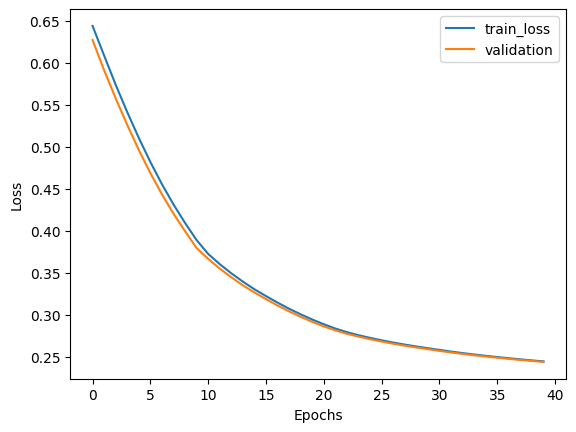

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'validation'], loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [24]:
y_pred = model.predict(X_test_p1_scaled)
y_pred = (y_pred > 0.5)
print('\n\nConfusion Matrixs')
print(confusion_matrix(y_test_p1, y_pred))
print('\n\nEvaluation metrics')
print(classification_report(y_test_p1, y_pred, digits=3))

1104/1104 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step


Confusion Matrixs
[[17807  2985]
 [  402 14119]]


Evaluation metrics
              precision    recall  f1-score   support

           0      0.978     0.856     0.913     20792
           1      0.825     0.972     0.893     14521

    accuracy                          0.904     35313
   macro avg      0.902     0.914     0.903     35313
weighted avg      0.915     0.904     0.905     35313



In [25]:
yy_pred = model.predict(X_test_scaled)
yy_pred = (yy_pred > 0.5)
print('\n\nConfusion Matrixs')
print(confusion_matrix(y_test, yy_pred))
print('\n\nEvaluation metrics')
print(classification_report(y_test, yy_pred, digits=5))

5518/5518 ━━━━━━━━━━━━━━━━━━━━ 5s 946us/step


Confusion Matrixs
[[87805 15133]
 [ 2128 71499]]


Evaluation metrics
              precision    recall  f1-score   support

           0    0.97634   0.85299   0.91050    102938
           1    0.82532   0.97110   0.89229     73627

    accuracy                        0.90224    176565
   macro avg    0.90083   0.91204   0.90140    176565
weighted avg    0.91336   0.90224   0.90291    176565



In [26]:
# model.save("dnn_cic_iot.h5")
# model.save("dnn_cic_iot.hdf5")
# model.save("dnn_cic_iot.keras")